In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import os
from IPython.display import display

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg = LogisticRegression().fit(X_train, y_train)
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


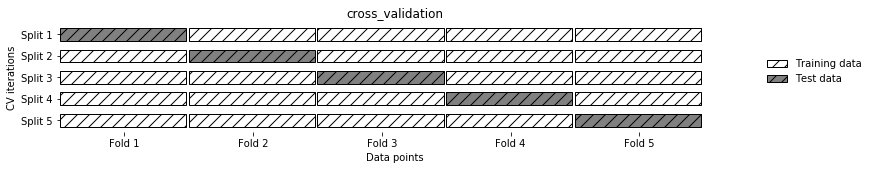

In [3]:
mglearn.plots.plot_cross_validation()

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96078431 0.92156863 0.95833333]


In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv = 5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.         0.96666667 0.93333333 0.9        1.        ]


In [6]:
print("Average cross-validation scores: {:.2f}".format(scores.mean()))

Average cross-validation scores: 0.96


In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels: \n{}".format(iris.target))

Iris labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


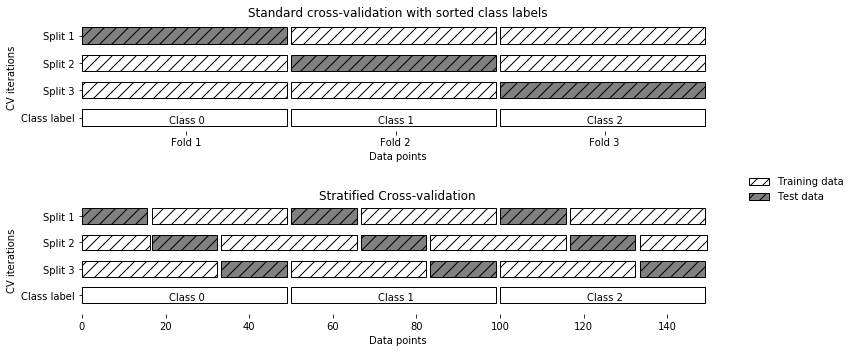

In [8]:
mglearn.plots.plot_stratified_cross_validation()

In [9]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5)

In [10]:
print("Cross-validation scores: \n{}".format(cross_val_score(logreg, iris.data, iris.target, cv = kfold)))

Cross-validation scores: 
[1.         0.93333333 0.43333333 0.96666667 0.43333333]


In [12]:
kfold = KFold(n_splits =  3)

In [13]:
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv = kfold)))

Cross-validation scores:
[0. 0. 0.]


In [14]:
kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)
print("Cross-validation scores: \n{}".format(cross_val_score(logreg, iris.data, iris.target, cv = kfold)))

Cross-validation scores: 
[0.9  0.96 0.96]


In [15]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)
print("Number of cv interactions: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv interactions:  150
Mean accuracy: 0.95


In [19]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size = .5, train_size = .5, n_splits = 10)
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.92       0.94666667 0.93333333 0.97333333 0.92       0.88
 0.96       0.94666667 0.86666667 0.96      ]


In [20]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples = 12, random_state = 0)

groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv = GroupKFold(n_splits = 3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.8        0.66666667]


In [22]:
mglearn.plots.plot_label_kfold()

AttributeError: module 'mglearn.plots' has no attribute 'plot_label_kfold'

In [23]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
print("Size of training set: {} size of test set: {}".format(X_train.shape[0], X_test.shape[0]))
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in  [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


In [24]:
from sklearn.svm import SVC

X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = 1)
print("Size of training set: {} size of validation set: {} size of test set: {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84 size of validation set: 28 size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


In [27]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv = 5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

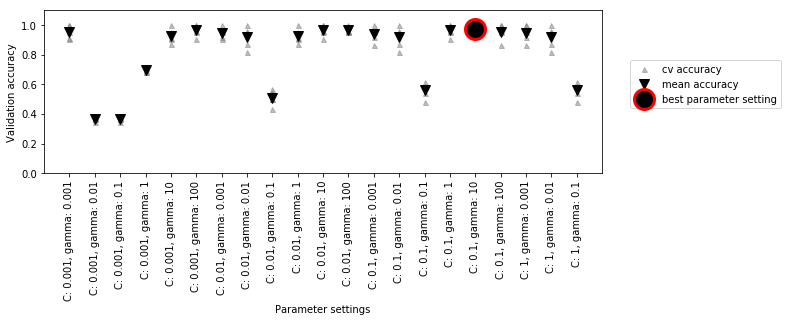

In [28]:
mglearn.plots.plot_cross_val_selection()

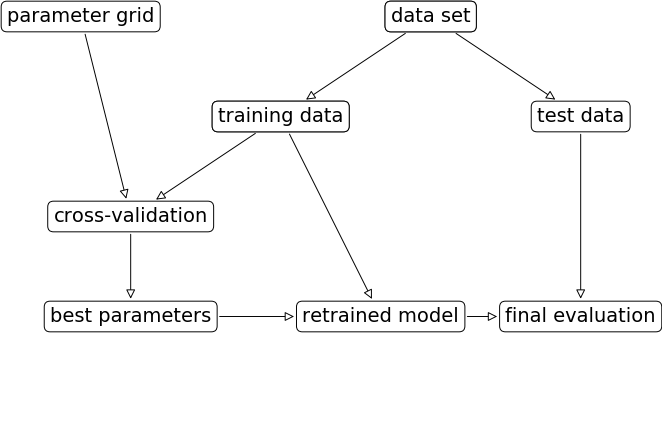

In [29]:
mglearn.plots.plot_grid_search_overview()

In [30]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid : \n {}".format(param_grid))

Parameter grid : 
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

In [33]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [36]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


In [38]:
print("Best estimator: \n{}".format(grid_search.best_estimator_))

Best estimator: 
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [39]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

/Users/ueharatakahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ueharatakahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ueharatakahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set retur

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000875,0.000461,0.000323,0.000081,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.000610,0.000014,0.000261,0.000010,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.000803,0.000161,0.000341,0.000102,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.000798,0.000136,0.000402,0.000023,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.000832,0.000150,0.000359,0.000060,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


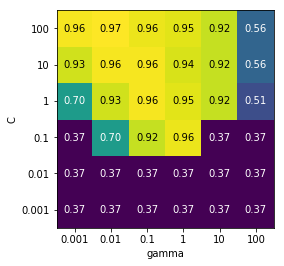

In [41]:
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel = 'gamma', xticklabels = param_grid['gamma'], ylabel = 'C', yticklabels = param_grid['C'], cmap = "viridis")

In [43]:
param_grid = [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [46]:
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [47]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

/Users/ueharatakahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ueharatakahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ueharatakahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set retur

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000992012,0.000823355,0.000600576,0.000939465,0.000837803,0.000776768,0.000620651,0.00055604,0.000599337,0.000587177,...,0.000456381,0.000469828,0.000667095,0.000695324,0.000431967,0.000376987,0.000319195,0.000321722,0.000471067,0.000417662
std_fit_time,0.000203891,0.000219292,1.86443e-05,0.000269073,0.000196439,0.000160121,0.000124658,8.17691e-05,8.47332e-05,9.05284e-05,...,0.00014696,2.94269e-05,2.52966e-05,1.27295e-05,3.81623e-05,3.3994e-05,1.07953e-05,3.05944e-05,0.000208569,0.000161694
mean_score_time,0.000396252,0.000332355,0.000246859,0.00044961,0.000462723,0.000307512,0.000275183,0.000217772,0.000236607,0.000266266,...,0.000249863,0.000206423,0.000214767,0.000235987,0.000237608,0.000225353,0.000184059,0.000191164,0.000216293,0.000232935
std_score_time,0.000111137,8.59761e-05,8.91137e-06,9.65165e-05,0.000120073,7.42306e-05,8.42672e-05,1.62437e-05,2.26086e-05,9.48643e-05,...,5.75882e-05,1.19051e-05,1.38179e-05,2.42889e-05,8.42949e-05,7.2939e-05,2.75164e-06,2.03434e-05,4.54152e-05,7.58846e-05
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,1,0.956522,0.478261,0.347826,0.826087,0.913043,0.956522,1,1


In [48]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

/Users/ueharatakahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ueharatakahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ueharatakahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set retur

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000992012,0.000823355,0.000600576,0.000939465,0.000837803,0.000776768,0.000620651,0.00055604,0.000599337,0.000587177,...,0.000456381,0.000469828,0.000667095,0.000695324,0.000431967,0.000376987,0.000319195,0.000321722,0.000471067,0.000417662
std_fit_time,0.000203891,0.000219292,1.86443e-05,0.000269073,0.000196439,0.000160121,0.000124658,8.17691e-05,8.47332e-05,9.05284e-05,...,0.00014696,2.94269e-05,2.52966e-05,1.27295e-05,3.81623e-05,3.3994e-05,1.07953e-05,3.05944e-05,0.000208569,0.000161694
mean_score_time,0.000396252,0.000332355,0.000246859,0.00044961,0.000462723,0.000307512,0.000275183,0.000217772,0.000236607,0.000266266,...,0.000249863,0.000206423,0.000214767,0.000235987,0.000237608,0.000225353,0.000184059,0.000191164,0.000216293,0.000232935
std_score_time,0.000111137,8.59761e-05,8.91137e-06,9.65165e-05,0.000120073,7.42306e-05,8.42672e-05,1.62437e-05,2.26086e-05,9.48643e-05,...,5.75882e-05,1.19051e-05,1.38179e-05,2.42889e-05,8.42949e-05,7.2939e-05,2.75164e-06,2.03434e-05,4.54152e-05,7.58846e-05
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,1,0.956522,0.478261,0.347826,0.826087,0.913043,0.956522,1,1


In [50]:
score = cross_val_score(GridSearchCV(SVC(), param_grid, cv = 5), iris.data, iris.target, cv = 5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [[0.36607143 0.36607143 0.36607143 0.36607143 0.36607143 0.36607143]
 [0.36607143 0.36607143 0.36607143 0.36607143 0.36607143 0.36607143]
 [0.36607143 0.69642857 0.91964286 0.95535714 0.36607143 0.36607143]
 [0.69642857 0.92857143 0.96428571 0.94642857 0.91964286 0.50892857]
 [0.92857143 0.96428571 0.96428571 0.9375     0.91964286 0.5625    ]
 [0.96428571 0.97321429 0.95535714 0.94642857 0.91964286 0.5625    ]]
Mean cross-validation score:  0.65625


In [60]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(X, y):
        best_params = {}
        best_score = -np.inf
        
        for parameters in parameter_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
                
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
                
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [61]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation score: {}".format(scores))

Cross-validation score: [0.96666667 1.         0.96666667 0.96666667 1.        ]


In [63]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

In [66]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted label: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted label: [False]
Test score: 0.90


In [67]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {}".format(tree.score(X_test, y_test)))

Test score: 0.9177777777777778


In [72]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

dummy score: 0.82


In [74]:
logreg = LogisticRegression(C = 0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

logreg score: 0.98


In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[401   2]
 [  8  39]]


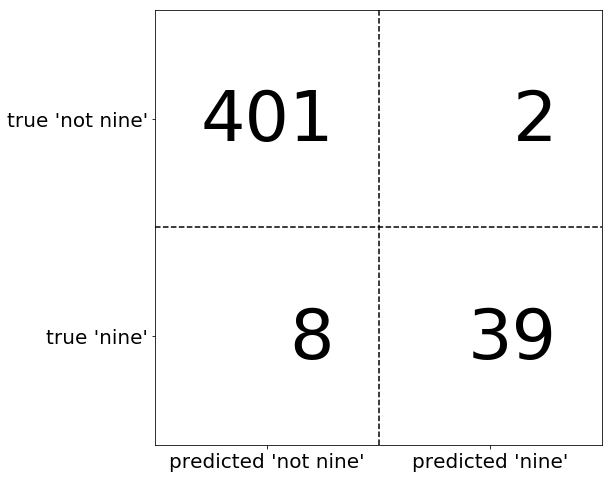

In [77]:
mglearn.plots.plot_confusion_matrix_illustration()

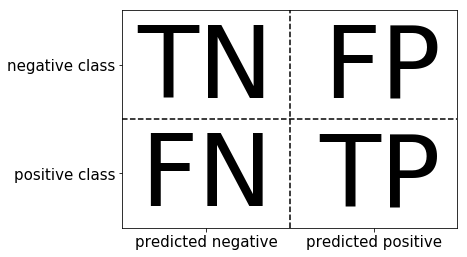

In [78]:
mglearn.plots.plot_binary_confusion_matrix()

In [81]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDummy tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[363  40]
 [ 45   2]]

Dummy tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  8  39]]


In [85]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.04
f1 score tree: 0.55
f1 score logistic regression: 0.89


/Users/ueharatakahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names = ["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



/Users/ueharatakahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [89]:
print(classification_report(y_test, pred_dummy, target_names = ["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.89      0.90      0.90       403
       nine       0.05      0.04      0.04        47

avg / total       0.80      0.81      0.81       450



In [90]:
print(classification_report(y_test, pred_logreg, target_names = ["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



In [100]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples = (400, 50), centers = 2, cluster_std = [7.0, 2], random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
svc = SVC(gamma = .05).fit(X_train, y_train)

/Users/ueharatakahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [101]:
mglearn.plots.plot_decision_threshold()

TypeError: unsupported operand type(s) for //: 'tuple' and 'int'

/Users/ueharatakahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0,0.5,'Recall')

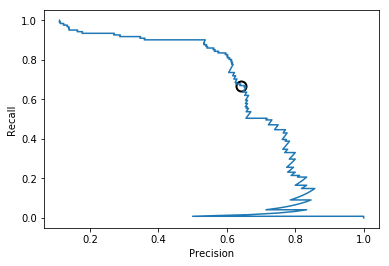

In [103]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

X, y = make_blobs(n_samples = (4000, 500), centers = 2, cluster_std = [7.0, 2], random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10, label = "threshold zero", fillstyle = "none", c = 'k', mew = 2)
plt.plot(precision, recall, label = "precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

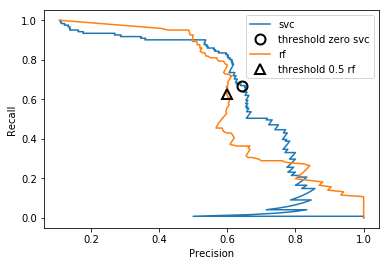

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0, max_features = 2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label = "svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10, label = "threshold zero svc", fillstyle =  "none", c = "k", mew = 2)
plt.plot(precision_rf, recall_rf, label = 'rf')

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c = 'k', markersize = 10, label = "threshold 0.5 rf", fillstyle = "none", mew = 2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc = "best")

In [106]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [107]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


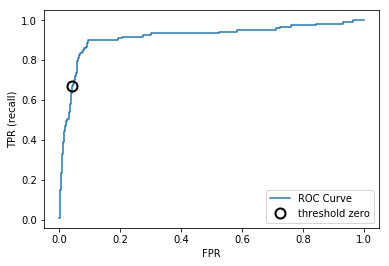

In [108]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label = "ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10, label = "threshold zero", fillstyle = "none", c = 'k', mew = 2)
plt.legend(loc = 4)

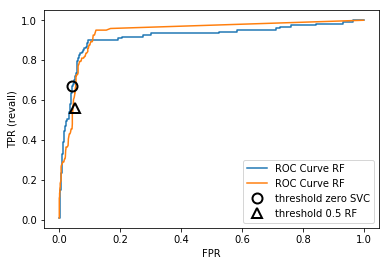

In [110]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label = "ROC Curve RF")
plt.plot(fpr_rf, tpr_rf, label = "ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (revall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10, label = "threshold zero SVC", fillstyle = "none", c = "k", mew = 2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize = 10, label = "threshold 0.5 RF", fillstyle = "none", c = 'k', mew = 2)
plt.legend(loc = 4)

In [114]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


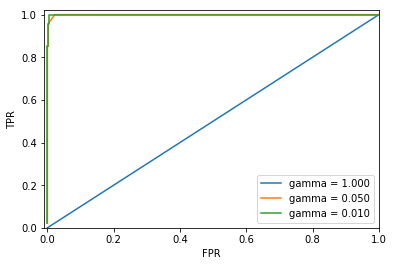

In [115]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)
plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma = gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label = "gamma = {:.3f}".format(gamma))
    
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc = "best")

In [117]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state = 0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


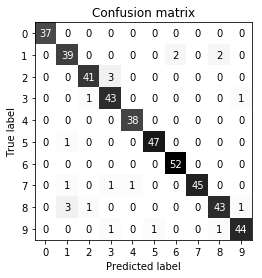

In [118]:
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel = 'Predicted label', ylabel = "True label", xticklabels = digits.target_names, yticklabels = digits.target_names, cmap = plt.cm.gray_r, fmt = "%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [119]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



In [120]:
print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average = "micro")))
print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average = "macro")))

Micro average f1 score: 0.953
Macro average f1 score: 0.954


In [122]:
print("Default scoring: {}".format(cross_val_score(SVC(), digits.data, digits.target == 9)))
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring = "accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring = "roc_auc")
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.89983306 0.89983306 0.89983306]
Explicit accuracy scoring: [0.89983306 0.89983306 0.89983306]
AUC scoring: [0.99372294 0.98957947 0.99594929]


In [123]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state = 0)
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid = param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy): 0.970
Test set AUC: 0.992
Test set accuracy: 0.973


In [125]:
grid = GridSearchCV(SVC(), param_grid = param_grid, scoring = "roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.997
Test set AUC: 1.000


In [126]:
from sklearn.metrics.scorer import SCORERS
print("Availaible scorers:\n{}".format(sorted(SCORERS.keys())))

Availaible scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
